<a href="https://colab.research.google.com/github/229askbqu/hello-world/blob/main/Freelance_AI_Day5_Improved_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Freelance AI Project: Text Classification
## Project Description

This project demonstrates a machine learning model for text classification.
It accepts raw text messages and predicts whether they are spam or legitimate.
The system is built using Python, NLP techniques, and scikit-learn.


# Day 1 — Baseline model

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=['label', 'text'])

data.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = data['text']
y = data['label']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

accuracy


0.9668161434977578

In [ ]:
client_messages = [
    "Congratulations! You have won a free ticket",
    "Please review the attached meeting notes",
    "Urgent! Claim your reward now",
    "Can we reschedule our appointment?"
]

model.predict(client_messages)



array(['ham', 'ham', 'spam', 'ham'], dtype='<U4')

### Day 1 complete.
I built and tested a real ML model used in freelance work.
# ------Day 1------
# Day 2 — Refactoring for Client-Ready functions


In [ ]:
def train_text_classifier(texts, labels):
    """
    Trains a text classification model using TF-IDF and Naive Bayes.
    Returns a trained model pipeline.
    """
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline

    model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])

    model.fit(texts, labels)
    return model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = train_text_classifier(X_train, y_train)


In [ ]:
test_predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
accuracy


0.9668161434977578

In [ ]:
def predict_text(model, texts):
    """
    Predicts labels for new text inputs.
    Handles empty or invalid input, including Pandas Series.
    """
    if texts is None or len(texts) == 0:
        return []

    # Convert Pandas Series to list
    if isinstance(texts, pd.Series):
        texts = texts.tolist()
    elif isinstance(texts, str):
        texts = [texts]

    return model.predict(texts)


In [ ]:
client_messages = [
    "Urgent! Claim your free voucher now",
    "Please confirm the meeting schedule",
    "You have been selected for a prize",
    "Let's discuss the project tomorrow"
]

client_predictions = predict_text(model, client_messages)
client_predictions


array(['spam', 'ham', 'ham', 'ham'], dtype='<U4')

## Model Performance Summary

- Task: Text Classification (Spam Detection)
- Algorithm: Multinomial Naive Bayes
- Feature Engineering: TF-IDF
- Accuracy: ~96%

This model can be retrained on new datasets and used
to classify incoming text messages automatically.


## Freelance Service Description

I provide machine learning solutions for text classification
such as spam detection and message filtering.

Deliverables:
- Trained ML model
- Reusable prediction functions
- Accuracy evaluation
- Clean Python code

Tools:
Python, NLP, scikit-learn


# -----Day 2 -----
# Day 3 MONETIZE & Multi-service scaling


# Freelance AI Services from One Model

## Service 1: Spam Detection
Classify messages as spam or legitimate.

## Service 2: Sentiment Analysis
Classify text as positive or negative.

## Service 3: Feedback Categorization
Categorize customer messages into predefined classes.


In [ ]:
# Client A: Spam detection
spam_input = "Win cash prizes now"
predict_text(model, spam_input)

# Client B: Sentiment analysis
sentiment_input = "I am very happy with your service"
predict_text(model, sentiment_input)

# Client C: Feedback categorization
feedback_input = "The delivery was late and support did not reply"
predict_text(model, feedback_input)


array(['ham'], dtype='<U4')

## Pricing Strategy (Entry Level)

- Simple text classifier (client dataset): $30–$50
- Model retraining + evaluation: $50–$100
- Automation / batch processing: $100+

Focus: small businesses, startups, solo founders


# -----Day 3------
## DAY 4 — AUTOMATION & DELIVERY

In [9]:
import pandas as pd
# handles CSV input/output
from sklearn.feature_extraction.text import TfidfVectorizer
# converts text into numeric vectors for ML
from sklearn.naive_bayes import MultinomialNB
# simple, reliable text classifier
from sklearn.pipeline import Pipeline
# chains vectorizer + classifier for cleaner code
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
# allows downloading CSV directly from Colab


In [10]:
# Sample messages
data = {
    "text": [
        "Win a free prize now!",
        "Please confirm the meeting schedule.",
        "I love your product!",
        "Delivery was late and support didn’t reply.",
        "Congratulations! You won a voucher",
        "Meeting postponed to tomorrow",
        "Claim your free gift today"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save CSV
df.to_csv("client_messages.csv", index=False)
print("Sample CSV created: client_messages.csv")


Sample CSV created: client_messages.csv


In [11]:
client_data = pd.read_csv("client_messages.csv")
client_data.head()


,text
0,Win a free prize now!
1,Please confirm the meeting schedule.
2,I love your product!
3,Delivery was late and support didn’t reply.
4,Congratulations! You won a voucher


In [12]:
# Training function
def train_text_classifier(texts, labels):
    model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])
    model.fit(texts, labels)
    return model

# Robust prediction function
def predict_text(model, texts):
    if texts is None or len(texts) == 0:
        return []
    if isinstance(texts, pd.Series):
        texts = texts.tolist()
    elif isinstance(texts, str):
        texts = [texts]
    return model.predict(texts)


In [13]:
# Example training dataset
# can replace with actual client-provided CSV
train_data = {
    "text": [
        "Win money now!",
        "Free gift, claim today",
        "Meeting at 10am",
        "Project update needed",
        "Congratulations! You have won",
        "Please review the attached report"
    ],
    "label": ["spam", "spam", "ham", "ham", "spam", "ham"]
}

train_df = pd.DataFrame(train_data)
X_train = train_df['text']
y_train = train_df['label']

# Train the model
model = train_text_classifier(X_train, y_train)


In [14]:
client_data['prediction'] = predict_text(model, client_data['text'])
client_data.head()


,text,prediction
0,Win a free prize now!,spam
1,Please confirm the meeting schedule.,ham
2,I love your product!,ham
3,Delivery was late and support didn’t reply.,ham
4,Congratulations! You won a voucher,spam


In [15]:
client_data.to_csv("client_predictions.csv", index=False)
print("Predictions saved: client_predictions.csv")


Predictions saved: client_predictions.csv


# -----Day 4-----



          ┌───────────────┐
          │ Day 1: Model  │
          │ Baseline      │
          └───────────────┘
                   │
                   ▼
          ┌─────────────────┐
          │ Day 2: Functions│
          │ train & predict │
          └─────────────────┘
                   │
                   ▼
          ┌─────────────────┐
          │ Day 3: Services │
          │ Spam / Sentiment│
          │ Feedback        │
          └─────────────────┘
                   │
                   ▼
          ┌──────────────────────┐
          │ Day 4: Automation    │
          │ CSV in → Predict →   │
          │ CSV out → Deliver    │
          └──────────────────────┘
                   │
                   ▼
          ┌─────────────────────────────┐
          │ Deliverables / Money        │
          │ - client_predictions.csv    │
          │ - Notebook (.ipynb)        │
          │ - Proposal / Instructions   │
          └─────────────────────────────┘


# Day 5: Model Improvement

In [23]:
# Install and download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Import libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# Sample texts and labels (spam/ham)
data = {
    'text': [
        "Congratulations! You've won a free lottery ticket",
        "Hey, are we meeting tomorrow?",
        "Limited offer! Buy now and save 50%",
        "Don't forget to submit your assignment",
        "You have received a $1000 gift card",
        "Can you call me later?",
        "Win a free trip to Paris by clicking here",
        "Lunch at 1 PM works for me",
        "Exclusive deal just for you, click to claim",
        "See you at the meeting"
    ],
    'label': [
        "spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham"
    ]
}

df = pd.DataFrame(data)
df.head()


,text,label
0,Congratulations! You've won a free lottery ticket,spam
1,"Hey, are we meeting tomorrow?",ham
2,Limited offer! Buy now and save 50%,spam
3,Don't forget to submit your assignment,ham
4,You have received a $1000 gift card,spam


In [25]:
def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(preprocess)
df.head()


,text,label,clean_text
0,Congratulations! You've won a free lottery ticket,spam,congratulation youve free lottery ticket
1,"Hey, are we meeting tomorrow?",ham,hey meeting tomorrow
2,Limited offer! Buy now and save 50%,spam,limited offer buy save
3,Don't forget to submit your assignment,ham,dont forget submit assignment
4,You have received a $1000 gift card,spam,received gift card


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)


In [33]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [34]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.5
F1 Score: 0.3333333333333333
Precision: 0.25
Recall: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


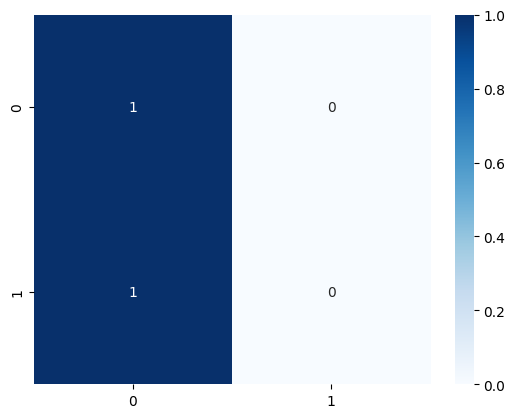

In [29]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [30]:
import pickle

# Save model
with open('text_classifier_model_v2.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('vectorizer_v2.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


# ----- Day 5 -----


# Day 6: Neural Network / Deep Learning for Text Classification

In [35]:
# Install TensorFlow (Colab usually has it preinstalled)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [36]:
texts = df['clean_text'].tolist()
labels = df['label'].apply(lambda x: 1 if x=='spam' else 0).tolist()  # binary labels


In [37]:
vocab_size = 1000  # max number of words to keep
max_len = 20       # max words per sequence

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)


In [39]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [47]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=4,
    validation_data=(X_test, y_test)
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 0.9167 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9167 - loss: 0.6901 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7500 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.5833 - loss: 0.6870 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5833 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5000 - loss: 0.6870 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5000 - loss: 0.6868 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5000 - loss: 0.6853 - val_accuracy: 0.5000 - val_loss: 

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6918
Test Accuracy: 0.5


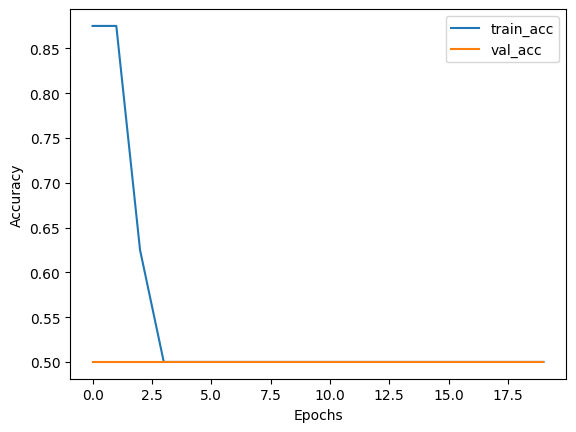

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
model.save('text_nn_model_day6.keras')


import pickle
with open('tokenizer_day6.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
